In [11]:
import pandas as pd

# import all the data to a single dataframe
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

# create a column with the month (and year) the review was made
reviews['month'] = reviews['date'].str[0:7]

# remove months prior to 2007 (less than 1000 reviews was common)
print(reviews.groupby('month').count().head(30))
reviews = reviews[reviews['month'] > '2007']

         review_id  user_id  business_id  stars  useful  funny  cool  text  \
month                                                                        
2005-02          3        3            3      3       3      3     3     3   
2005-03         74       74           74     74      74     74    74    74   
2005-04         26       26           26     26      26     26    26    26   
2005-05        108      108          108    108     108    108   108   108   
2005-06         38       38           38     38      38     38    38    38   
2005-07        259      259          259    259     259    259   259   259   
2005-08         66       66           66     66      66     66    66    66   
2005-09         69       69           69     69      69     69    69    69   
2005-10         39       39           39     39      39     39    39    39   
2005-11         70       70           70     70      70     70    70    70   
2005-12        102      102          102    102     102    102  

In [15]:
# group all the review in a month together and take the average
monthly_reviews = reviews.groupby('month').mean()
monthly_reviews.head(200)

,stars,useful,funny,cool
month,,,,
2007-01,3.889027,1.566085,0.890274,0.905237
2007-02,3.706338,1.897183,0.703521,1.207746
2007-03,3.726825,1.687449,0.677605,0.894996
2007-04,3.929793,1.774077,0.805581,1.061206
2007-05,3.926211,2.362335,0.675110,1.328194
...,...,...,...,...
2021-09,3.615514,0.757118,0.198461,0.453866
2021-10,3.654734,0.692642,0.176416,0.406640
2021-11,3.675040,0.796413,0.212277,0.521427


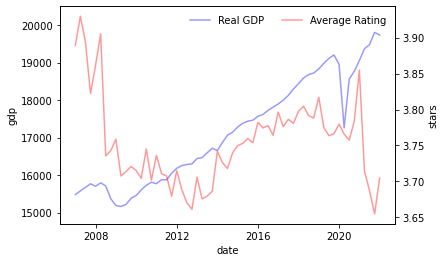

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the US gdp in line plot
fig, ax1 = plt.subplots()
us_gdp = pd.read_csv('csv_data/us_gdp.csv')
us_gdp['date'] = us_gdp['date'].str[0:7]
sns.lineplot(data=us_gdp, x='date', y='gdp', ax=ax1, color='blue', alpha=0.4, label='Real GDP')
plt.legend(loc='upper center', frameon=False)
plt.ylim(14700, 20500)

# plot the monthly average rate in a second axis
ax2 = ax1.twinx()
reduced_monthly_reviews = monthly_reviews.iloc[::3, :]
sns.lineplot(data=reduced_monthly_reviews, x='month', y='stars', ax=ax2, color='red', alpha=0.4, label='Average Rating')
plt.xticks(['2008-01', '2012-01', '2016-01', '2020-01'], ['2008', '2012', '2016', '2020'])
plt.legend(loc='best', frameon=False)

# showing the figure and saving it
plt.savefig('figures/gdp_vs_ratings', dpi=100)
plt.show()